## Adhaar Card Tampering Detection

#### The purpose of this project is to detect tampering of Adhaar card using computer vision. This project will help different organization in detecting whether the Id i.e. the Adhaar card provided to them by their employees or customers or anyone is original or not.

In [ ]:
# importing essential packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [ ]:
# Let's open the images
original = Image.open(requests.get('https://i.pinimg.com/originals/ff/71/c3/ff71c3cd26d34f1340a3f410f6e03a3f.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://adarshc.com/index/ent/document/default/aadhar.jpg', stream=True).raw) 

#### Loading original and user provided images.

In [ ]:
# Let's see in what kind of format these files are with
print("Original image format : ",original.format) 
print("Tampered image format : ",tampered.format)

# Let's also analyze the length as well as height of the photos. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size) 
print("Tampered image size : ",tampered.size) 

Original image format :  JPEG
Tampered image format :  JPEG
Original image size :  (400, 266)
Tampered image size :  (448, 311)


#### Converting the format of  tampered image similar to original image.

In [ ]:
# Resize Image
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png')
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')

(250, 160)
(250, 160)


In [ ]:
# Change image type if required from png to jpg
tampered = Image.open('pan_card_tampering/image/tampered.png')
tampered.save('pan_card_tampering/image/tampered.png')#can do png to jpg

#### Converting the size of tampered and original image.

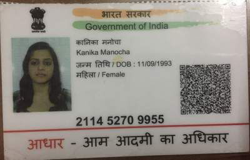

In [ ]:
# Display original image
original

#### Orginial PAN card image used for comparision.

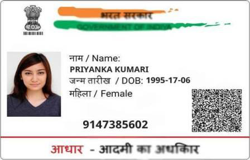

In [ ]:
# Display user given image
tampered

#### User provided image which will be compared with PAN card.

In [ ]:
# load the two input images
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

#### Reading images using opencv.

In [ ]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

#### Converting images into grayscale using opencv is very important. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images beacuse they have 3 channel while grayscale has only 1 channel.  

In [ ]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.2737602134973422


#### Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. The lower the SSIM score lower is the similarity.

In [ ]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

#### Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula.
#### Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [ ]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

#### Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.

Original Format Image


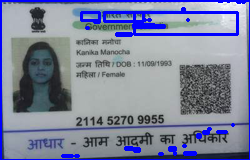

In [ ]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


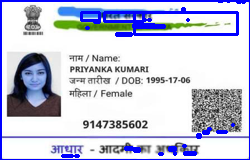

In [ ]:
#Diplay tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


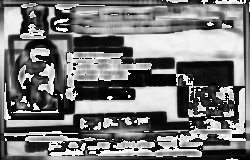

In [ ]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


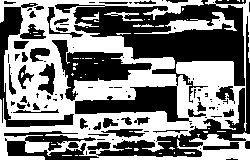

In [ ]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

### Scope

#### This project can be used in different organizations where customers or users need to provide any kind of id in order to get themselves verified. The organization can use this project to find out whether the ID is original or fake. Similarly this can be used for any type of ID like pan card, voter id so and so forth..